In [38]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
from statsmodels.api import OLS
import yfinance as yf

In [168]:
eusa = pd.read_excel('excel_data/EUSA.xlsx')
eusa.drop(columns=['Unnamed: 0'], inplace=True)
eusa.rename(columns={'Net Asset Value': 'NAV', 'Last Price': 'Close'}, inplace=True)
eusa.dropna(inplace=True)
"""
Dropping nulls might mess up the analysis, but it seems like a safer option
compared to filling with the average of the previous and next values (as
doing so would add fake predictivity)
"""
eusa.head()

,Date,NAV,Close
1,2023-01-19,74.9908,75.00
2,2023-01-18,75.8862,75.91
3,2023-01-17,77.0371,77.07
5,2023-01-13,77.0854,77.09
6,2023-01-12,76.8496,76.86


In [176]:
# Get data for spy from yfinance for the same dates in eusa
spy = yf.download('SPY', start='2021-01-01', end='2023-01-19')
spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,358.128723,110210800
2021-01-05,368.100006,372.500000,368.049988,371.329987,360.595306,66426200
2021-01-06,369.709991,376.980011,369.119995,373.549988,362.751099,107997700
2021-01-07,376.100006,379.899994,375.910004,379.100006,368.140686,68766800
2021-01-08,380.589996,381.489990,377.100006,381.260010,370.238251,71677200


In [177]:
print(f'Number of entries: {len(eusa)}')
print(f'Number of entries: {len(spy)}')

Number of entries: 2000
Number of entries: 514


In [178]:
# make a new dataframe for eusa after 2021-01-01
eusa2 = eusa[eusa['Date'] >= '2021-01-01']
# sort by the date ascending
eusa2.sort_values(by='Date', inplace=True)
eusa2.head()

/var/folders/rs/k8yvpht95zxbr8d7v79msjk00000gn/T/ipykernel_26465/484418263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eusa2.sort_values(by='Date', inplace=True)


,Date,NAV,Close
534,2021-01-04,71.02,71.0300
533,2021-01-05,71.70,71.6605
532,2021-01-06,73.03,72.9900
531,2021-01-07,74.03,74.0561
530,2021-01-08,74.21,74.1801


In [179]:
# Ensure that both dataframes oly have entries for dates that are in both
#eusa2 = eusa2[eusa2['Date'].isin(spy.index)]
#spy = spy[spy.index.isin(eusa['Date'])]
print(f'Number of entries: {len(eusa2)}')
print(f'Number of entries: {len(spy)}')
eusa2.head()

Number of entries: 515
Number of entries: 514


,Date,NAV,Close
534,2021-01-04,71.02,71.0300
533,2021-01-05,71.70,71.6605
532,2021-01-06,73.03,72.9900
531,2021-01-07,74.03,74.0561
530,2021-01-08,74.21,74.1801


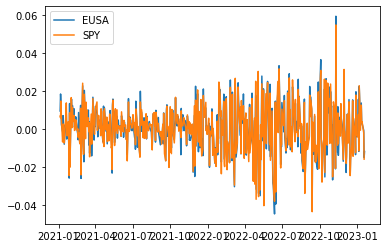

In [180]:
# Plot the percent changes of the two series
plt.plot(eusa2['Date'], eusa2['NAV'].pct_change(), label='EUSA')
plt.plot(spy.index, spy['Close'].pct_change(), label='SPY')
plt.legend()
plt.show()

In [181]:
eusa2.reset_index(inplace=True)

spy.reset_index(inplace=True)

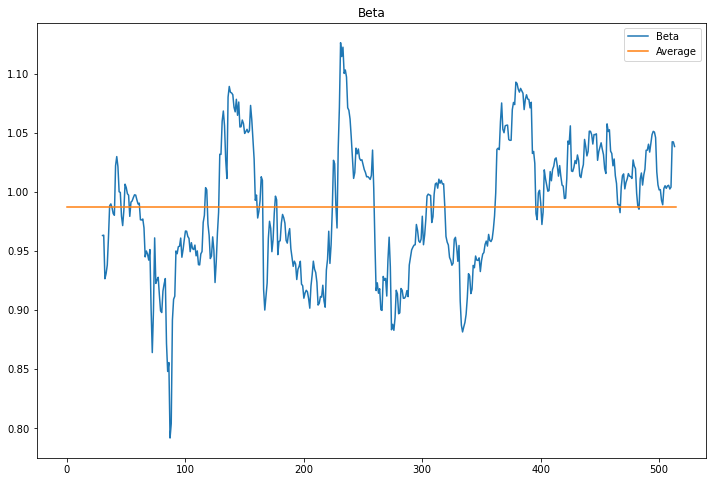

In [182]:
# Plot the beta over time
plt.figure(figsize=(12, 8))
plt.plot((eusa2['NAV'].pct_change().rolling(30).cov(spy['Adj Close'].pct_change()) / (spy['Adj Close'].pct_change().rolling(30).var())), label='Beta')
# Plot the average
plt.plot(np.ones(len(eusa2['NAV'].pct_change())) * (eusa2['NAV'].pct_change().rolling(30).cov(spy['Adj Close'].pct_change()) / (spy['Adj Close'].pct_change().rolling(30).var())).mean(), label='Average')
plt.title('Beta')
plt.legend()
plt.show()

##### Conclusion

eusa vs eusa.nav is extremely stationary
spy can potentially be traded as the hedge to eusa

In [26]:
# Testing to see if eusa and spy are cointegrated

In [31]:
# Get a df of eusa for the dates 2022-01-01 to 2023-01-01
eusa_2022 = eusa[eusa['Date'] >= '2022-01-01']
eusa_2022 = eusa_2022[eusa_2022['Date'] < '2023-01-01']
eusa_2022.head()

,Date,NAV,Close
15,2022-12-30,72.9737,72.9400
16,2022-12-29,73.2619,73.3100
17,2022-12-28,71.8457,71.8600
18,2022-12-27,72.8227,72.8700
20,2022-12-23,72.9354,72.9403


In [32]:
# Get a df from yfinance of spy for the same dates as eusa_2022
spy_2022 = yf.download('SPY', start=eusa_2022['Date'].min(), end=eusa_2022['Date'].max())
spy_2022.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,470.083649,72668200
2022-01-04,479.220001,479.980011,475.579987,477.549988,469.926208,71178700
2022-01-05,477.160004,477.980011,468.279999,468.380005,460.902649,104538900
2022-01-06,467.890015,470.820007,465.429993,467.940002,460.469635,86858900
2022-01-07,467.950012,469.200012,464.649994,466.089996,458.649170,85111600


In [33]:
# Ensure they both have the same dates
eusa_2022 = eusa_2022[eusa_2022['Date'].isin(spy_2022.index)]
spy_2022 = spy_2022[spy_2022.index.isin(eusa_2022['Date'])]
print(f'Number of entries: {len(eusa_2022)}')
print(f'Number of entries: {len(spy_2022)}')

Number of entries: 250
Number of entries: 250


In [34]:
df = pd.merge(eusa_2022, spy, on='Date', suffixes=('_EUSA', '_SPY'))
df.head()

,Date,NAV,Close_EUSA,Open,High,Low,Close_SPY,Adj Close,Volume
0,2022-12-29,73.2619,73.3100,379.630005,384.350006,379.079987,383.440002,383.440002,66970900
1,2022-12-28,71.8457,71.8600,381.329987,383.390015,376.420013,376.660004,376.660004,70911500
2,2022-12-27,72.8227,72.8700,382.790009,383.149994,379.649994,381.399994,381.399994,51638200
3,2022-12-23,72.9354,72.9403,379.649994,383.059998,378.029999,382.910004,382.910004,59857300
4,2022-12-22,72.5306,72.5500,383.049988,386.209991,374.769989,380.720001,380.720001,100120900


In [35]:
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,index,NAV,Close_EUSA,Open,High,Low,Close_SPY,Adj Close,Volume
Date,,,,,,,,,
2022-01-03,249,89.3991,89.3700,476.299988,477.850006,473.850006,477.709991,470.083679,72668200
2022-01-04,248,89.6828,89.7400,479.220001,479.980011,475.579987,477.549988,469.926239,71178700
2022-01-05,247,87.8836,87.9100,477.160004,477.980011,468.279999,468.380005,460.902649,104538900
2022-01-06,246,88.0271,88.0600,467.890015,470.820007,465.429993,467.940002,460.469666,86858900
2022-01-07,245,87.7330,87.8087,467.950012,469.200012,464.649994,466.089996,458.649200,85111600


In [36]:
trainset = np.arange(0, 252)
df = df.iloc[trainset, :]  # use only first year of data for training

IndexError: positional indexers are out-of-bounds